# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [10]:
#= 
Incluir comentarios y documentación

Si es necesario que expliciten el tipo de alguna de los argumentos de
la función, háganlo a su conveniencia

=#
function derivada_derecha(f, x0, h)
    # código
end

derivada_derecha (generic function with 1 method)

In [1]:
function f(x)
    return (3x^3)-2
end

f (generic function with 1 method)

In [2]:
"""
limite1(f,h,x0=0,0)
esta función evaluará cierto límite, el cual estará definido por dos variables, x0 y h. 
Cabe mencionar que este programa sólo da aproximación
"""
function limite1(f,h,x0=0.0)
    f_prima=(f(x0+h)-f(x0))/h #declaro la operación por hacer.
    derivada=f_prima #guarda los datos
end
    

limite1

In [12]:
valor_realx0_de_f=9

9

In [3]:
conjunto_h=logspace(0.0,0.5,50)

50-element Array{Float64,1}:
 1.0    
 1.02377
 1.04811
 1.07303
 1.09854
 1.12466
 1.1514 
 1.17877
 1.20679
 1.23548
 1.26486
 1.29493
 1.32571
 ⋮      
 2.44205
 2.50011
 2.55955
 2.6204 
 2.6827 
 2.74647
 2.81177
 2.87862
 2.94705
 3.01711
 3.08884
 3.16228

In [14]:
limite1(f,0.00001,1.0)

9.000090000332861

In [7]:

error=[] #el error se llenará conforme se ejecute cada elemento de las h's propuestas en el vector
for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=limite1(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_derivada=abs(9-derivadas) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_derivada)#se insertan los valores en el vector de error.
    
end

In [8]:
error

50-element Array{Any,1}:
 12.0   
 12.3583
 12.7286
 13.1115
 13.5072
 13.9165
 14.3397
 14.7774
 15.2302
 15.6986
 16.1833
 16.6848
 17.2039
  ⋮     
 39.8693
 41.2526
 42.6898
 44.1831
 45.7348
 47.3476
 49.024 
 50.7668
 52.5788
 54.463 
 56.4225
 58.4605

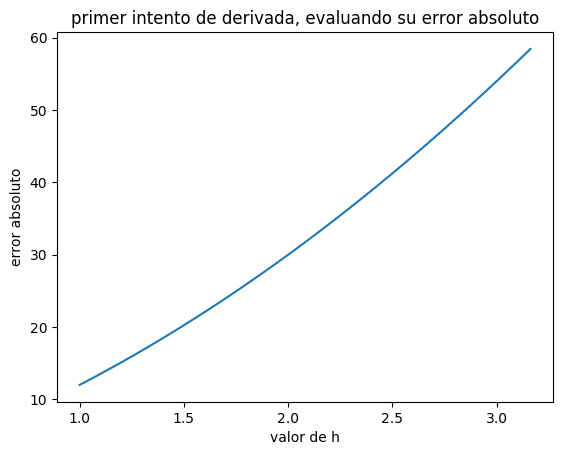

In [9]:
using PyPlot
plot(conjunto_h,error)
xlabel("valor de h")
ylabel("error absoluto")
title("primer intento de derivada, evaluando su error absoluto")
show()

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [10]:
"""
limite2(f,h,x0=0.0)
la finalidad de esta función es semejante al del problema 1, pero en este cas, se considerará la convergencia de los dos lados
de la función, esto quiere decir, tanto izquierda como derecha.
"""
function limite2(f,h,x0=0.0)
    f_prima2=(f(x0+h)-f(x0-h))/(2*h)   #declaro la operación a seguir.
    derivada_doslados=f_prima2
end

limite2

In [11]:
#haciendo copy-paste del la funcion error del problema 1

error=[] #el error se llenará conforme se ejecute cada elemento de las h's propuestas en el vector
for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=limite2(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_derivada=abs(9-derivadas) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_derivada)#se insertan los valores en el vector de error.
    
end

In [12]:
error

50-element Array{Any,1}:
  3.0    
  3.14434
  3.29562
  3.45419
  3.62038
  3.79457
  3.97713
  4.16849
  4.36905
  4.57925
  4.79958
  5.0305 
  5.27253
  ⋮      
 17.8909 
 18.7517 
 19.6539 
 20.5995 
 21.5906 
 22.6294 
 23.7181 
 24.8593 
 26.0553 
 27.3089 
 28.6229 
 30.0    

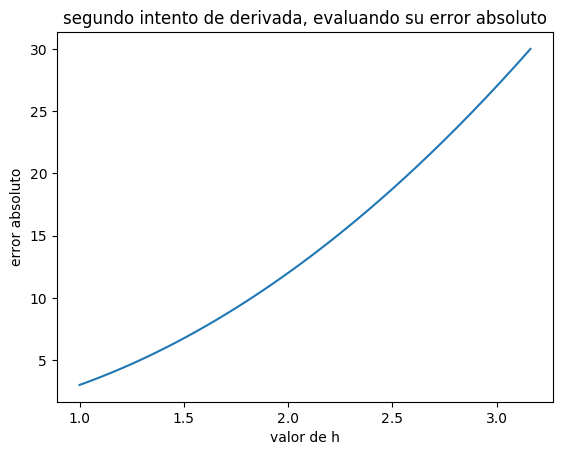

In [13]:
using PyPlot
plot(conjunto_h,error)
xlabel("valor de h")
ylabel("error absoluto")
title("segundo intento de derivada, evaluando su error absoluto")
show()

El error absoluto que existe tanto en el límite definido en el problema 1 como en el problema 2 son del mismo orden, no obstante, en la modificación realizada en la función de *"limite2"* permite que este error disminuya (siendo específicos, el error absoluto del segundo métido disminuye a la mitad en comparación con el primer método). También esto repercute en la convergencia de los resultadosobtenidos, ya que son más cercanos al valor real.

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [14]:
"""
limitecomplex(f,h,x0)
esta función genera una derivada en números complejos
"""
function limitecomplex(f,h,x0=0.0)
    numero=f(x0+h*im)
    derivada_complex=numero/h   #se define la derivada en complejos.
    return imag(derivada_complex)
end

limitecomplex

In [15]:
limitecomplex(f,0.00001,1.0)

8.9999999997

In [16]:
error=[] #al igual que en los otros incisos, se genera un vector con el error absoluto de la funcion compleja
for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=limitecomplex(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_complex=abs(9-derivadas) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_complex)#se insertan los valores en el vector de error.
    
end

In [17]:
error

50-element Array{Any,1}:
  3.0    
  3.14434
  3.29562
  3.45419
  3.62038
  3.79457
  3.97713
  4.16849
  4.36905
  4.57925
  4.79958
  5.0305 
  5.27253
  ⋮      
 17.8909 
 18.7517 
 19.6539 
 20.5995 
 21.5906 
 22.6294 
 23.7181 
 24.8593 
 26.0553 
 27.3089 
 28.6229 
 30.0    

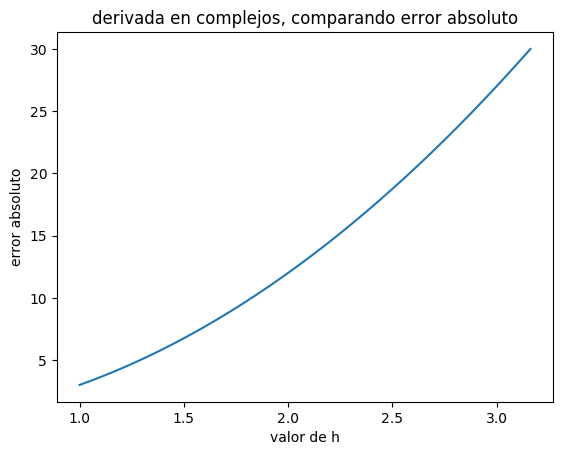

In [18]:
using PyPlot
plot(conjunto_h,error)
xlabel("valor de h")
ylabel("error absoluto")
title("derivada en complejos, comparando error absoluto")
show()

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

La derivada en la función compleja ofrece la ventaja de utilizar valores complejos sin mencionar que el error absoluto es semejante al de la segunda definición de límite usada en esta tarea, esto también se ve en la convergencia de los valores ofrecidos por el vector h.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?

En las clases de cálculo se utiliza el límite para aproximarse de manera continua al valor deseado, sin embargo, en la computadora no es posible acercase a este número de forma continua, por lo que se requiere a la discretización de estos términos. Por lo tanto, esta cuestión se refleja en el vector "conjunto_h" y en las definiciones de límite, debido a que si se manejara el valor de cero, los límites divergerían.